## Project Name : Customer Segmentation Clustering

### Contribution : Individual

The aim of this project is to perform clustering on the data based on the 'Occupation' column to identify group patterns that may exist between different occupations.

## Data Dictionary

| Column Name         | Description                                           |
|---------------------|-------------------------------------------------------|
| ID                  | Shows a unique identificator of a customer            |
| Sex                 | Gender of a customer. In this dataset there are       |
| Marital Status      | Marital status of a customer                          |
| Age                 | The age of a customer                                 |
| Education           | Level education of a customer                         |
| Income              | Self-reported annual income of the customer           |
| Occupation          | Category of occupation of a customer                  |
| Settlement Size     | The size of the city that the customer lives in       |

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
sns.set(palette='pastel', style='whitegrid')
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report, silhouette_score

In [2]:
# load dataset
dataset = '/content/segmentation data.csv'

df = pd.read_csv(dataset)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


**sex :** 0 female and 1 male

**marital status :** 0 single and 1 non single

## Data Preprocessing Part 1

In [3]:
# drop the ID column because not needed
df.drop('ID', axis=1, inplace=True)

In [4]:
# checking the shape of dataset
df.shape

(2000, 7)

In [5]:
# checking detail information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [6]:
# show the descriptive statistics of the dataset
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
df['Education'].value_counts()

1    1386
2     291
0     287
3      36
Name: Education, dtype: int64

0 : other

1 : high school

2 : university

3 : graduated school

In [8]:
df['Settlement size'].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

0 : small city

1 : mid city

2 : big city

In [9]:
df['Occupation'].value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

0 : unemployed / unskilled

1 : skilled employee / official

2 : management / self-employed

In [10]:
# checking the duplicated value
df.duplicated().sum()

0

In [11]:
# checking the null value
df.isnull().sum() * 100 / len(df)

Sex                0.0
Marital status     0.0
Age                0.0
Education          0.0
Income             0.0
Occupation         0.0
Settlement size    0.0
dtype: float64

## Eksploratory Data Analysis (EDA)

In [12]:
df.tail()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0
1999,0,0,25,0,68416,0,0


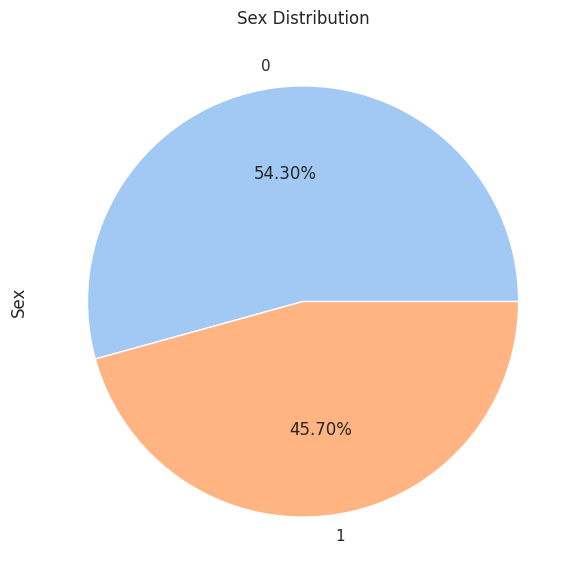

In [13]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(7,7))
plt.title('Sex Distribution')
plt.show()

Based on the pie plot distribution above, it can be seen that the representation of male sex is greater than that of female sex, with percentages of 54.30% and 45.70% respectively.

Text(120954.419, 200, 'age mean = 120954.42')

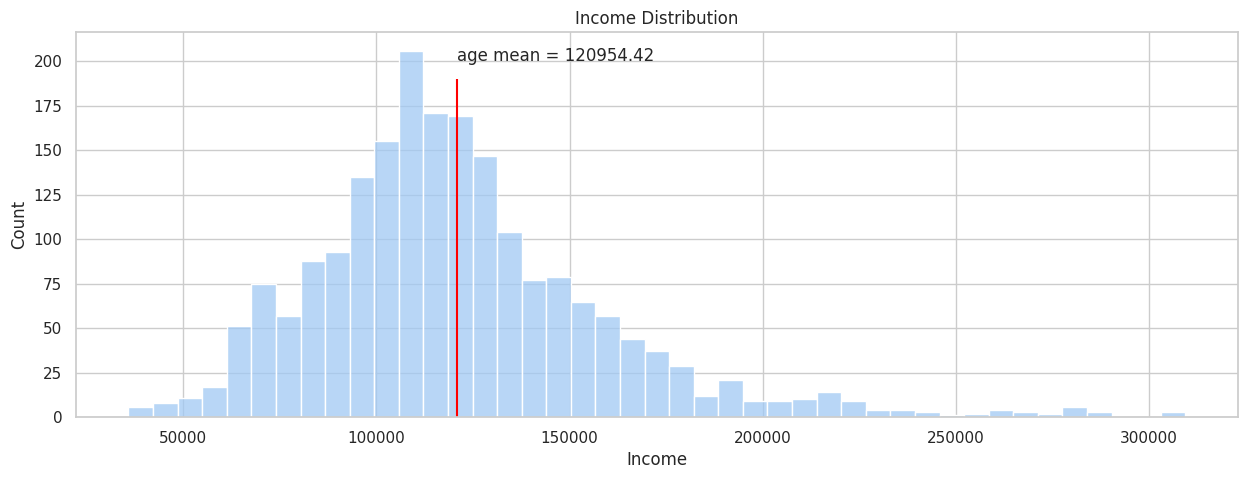

In [14]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Income')
ax.set(title = 'Income Distribution')
plt.vlines(df.Income.mean(),0, 190, color = 'red')
plt.annotate('age mean = %.2f' % df.Income.mean(), (df.Income.mean(), 200))

Text(35.909, 310, 'age mean = 35.91 years')

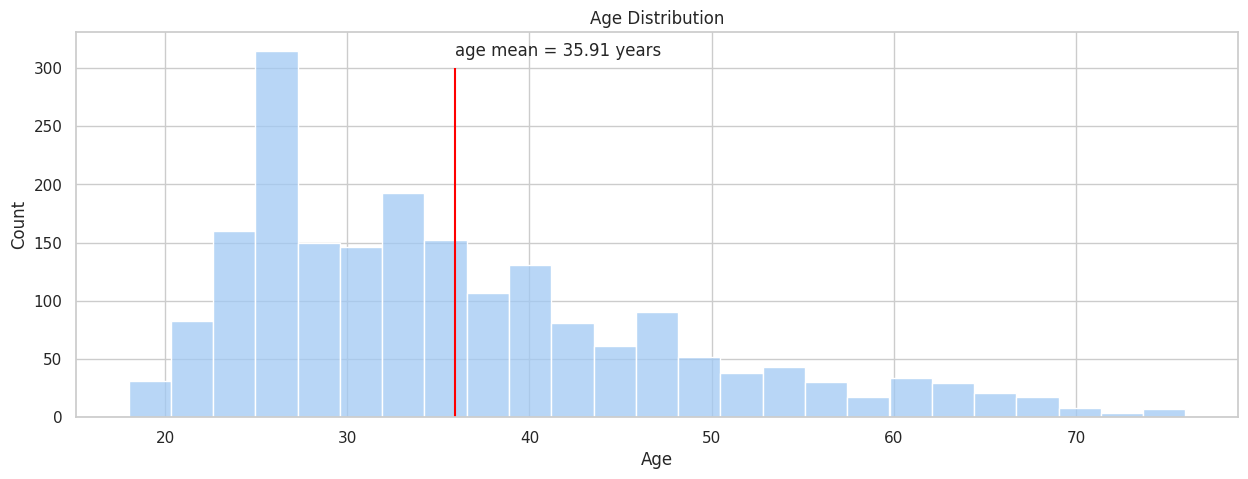

In [15]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = df, x = 'Age')
ax.set(title = 'Age Distribution')
plt.vlines(df.Age.mean(),0, 300, color = 'red')
plt.annotate('age mean = %.2f years' % df.Age.mean(), (df.Age.mean(), 310))

Text(0.5, 1.0, 'Education Distribution')

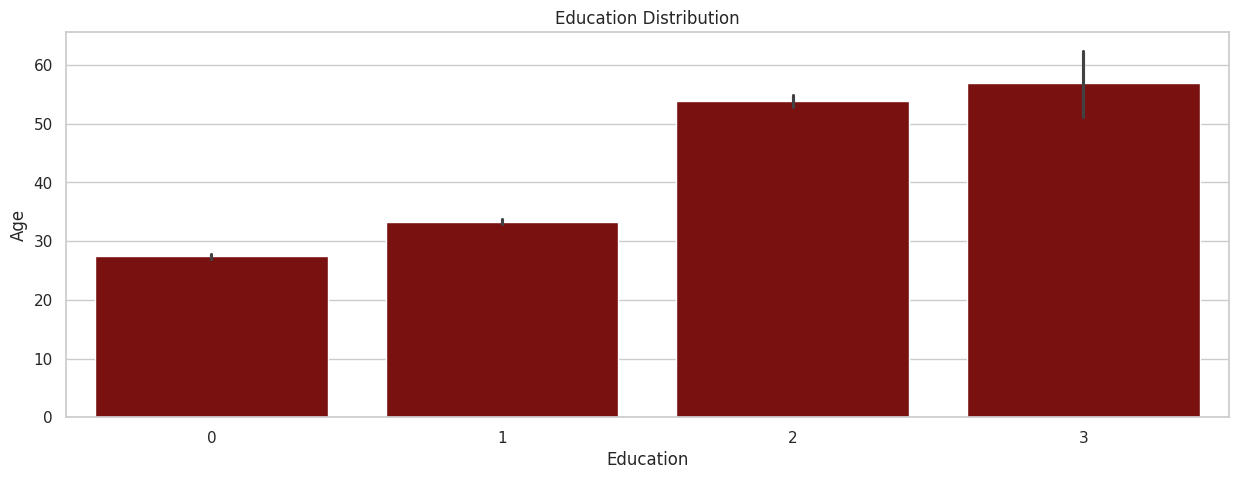

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Education', y='Age',color='darkred').set_title('Education Distribution')

Text(0.5, 1.0, 'Distribution Education by Sex')

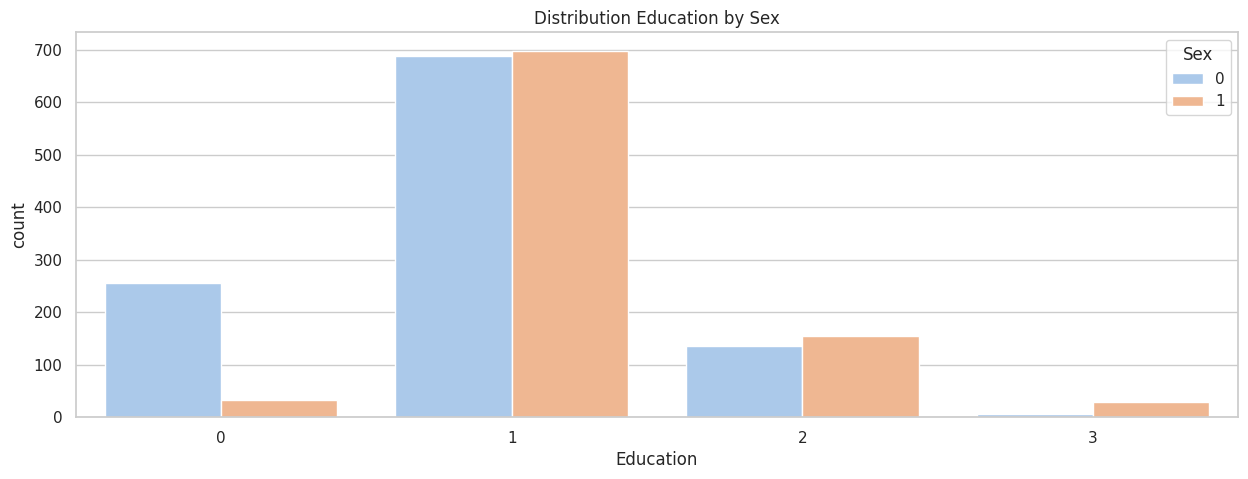

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Education', hue='Sex').set_title('Distribution Education by Sex')

Text(0.5, 1.0, 'Distribution Education by Age')

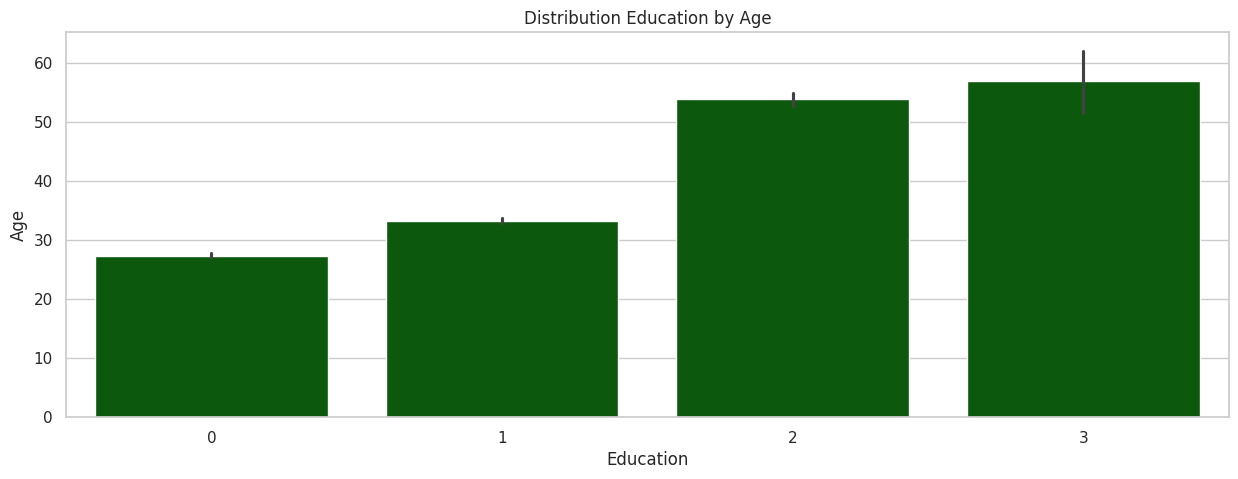

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Education', y='Age', color='darkgreen').set_title('Distribution Education by Age')

Text(0.5, 1.0, 'Correlation Plot')

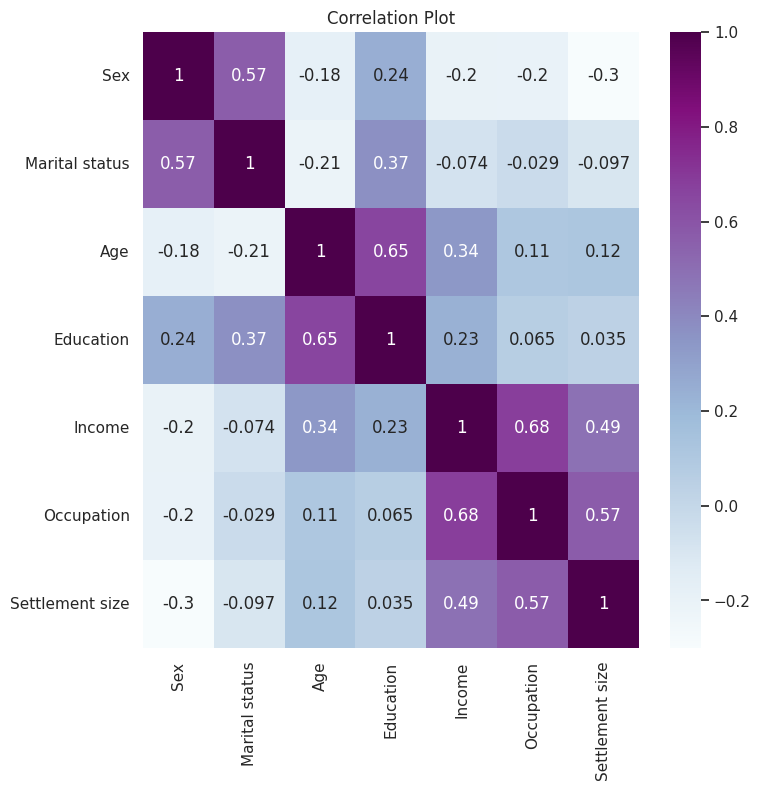

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='BuPu').set_title('Correlation Plot')

## Data Preprocessing Part 2

In [20]:
num_clusters = range(1, 11)
inertia = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

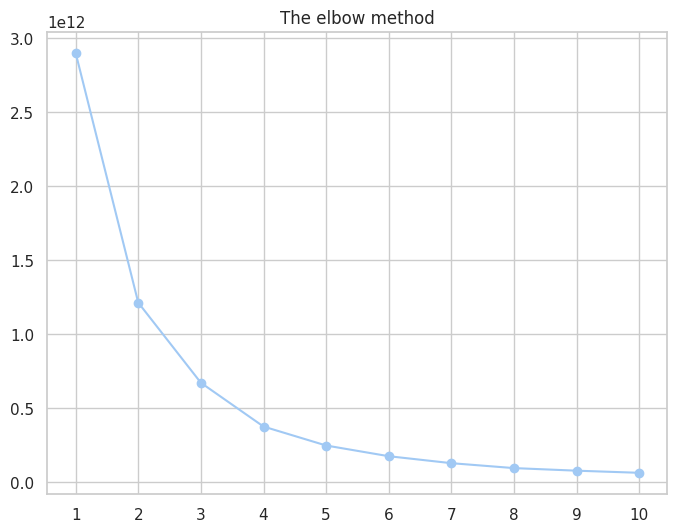

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('The elbow method')
plt.xticks(num_clusters)
plt.show()

ccording to the elbow method we can assume 3 clusters for our data

In [22]:
SEED = np.random.seed(300)
kmeans = KMeans(n_clusters=4, random_state=SEED)
labels = kmeans.fit_predict(df)
df['cluster'] = labels

<Axes: xlabel='Age', ylabel='Income'>

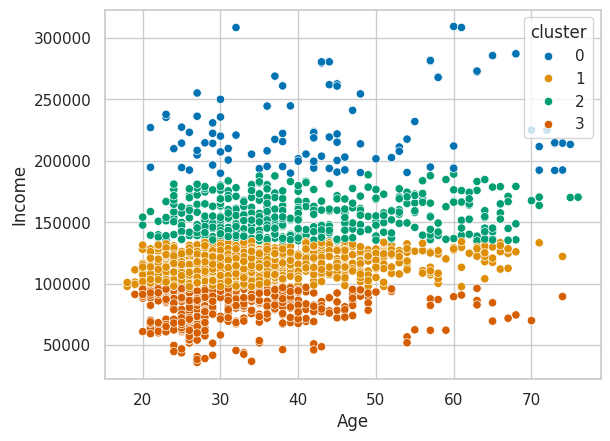

In [23]:
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

In [24]:
silhouette_avg = silhouette_score(df, df.cluster)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5428478923817803


The silhouette score ranges from -1 to 1.

A higher silhouette score indicates better-defined clusters.
Evaluate the score based on the following guidelines:

0.71 - 1.0: Excellent clustering.

0.51 - 0.70: Reasonable clustering.

0.26 - 0.50: Poor clustering.

Less than 0.25: Very poor clustering


Let's try different numbers of clusters, i will choose 3 and 5 cluster therefore it is closest to 4

In [25]:
# cluster 3
SEED = np.random.seed(300)
df.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 3, random_state = SEED)
labels = kmeans.fit_predict(df)
df['cluster'] = labels
silhouette_avg = silhouette_score(df, df.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5124711688681454


In [26]:
# cluster 5
SEED = np.random.seed(300)
df.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 5, random_state = SEED)
labels = kmeans.fit_predict(df)
df['cluster'] = labels
silhouette_avg = silhouette_score(df, df.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5401417577104871


We can conclude that the best number of clusters was 4 according to silhouette score.

In [27]:
# Getting data with 4 clusters
SEED = np.random.seed(300)
df.drop(columns = 'cluster')
kmeans = KMeans(n_clusters = 4, random_state = SEED)
labels = kmeans.fit_predict(df)
df['cluster'] = labels
silhouette_avg = silhouette_score(df, df.cluster)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5428478923817803


<Axes: xlabel='Age', ylabel='Income'>

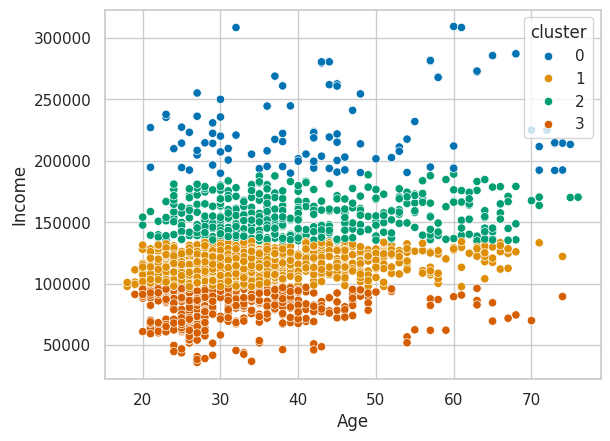

In [28]:
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = 'cluster', palette='colorblind')

Text(0.5, 1.0, 'Income per cluster')

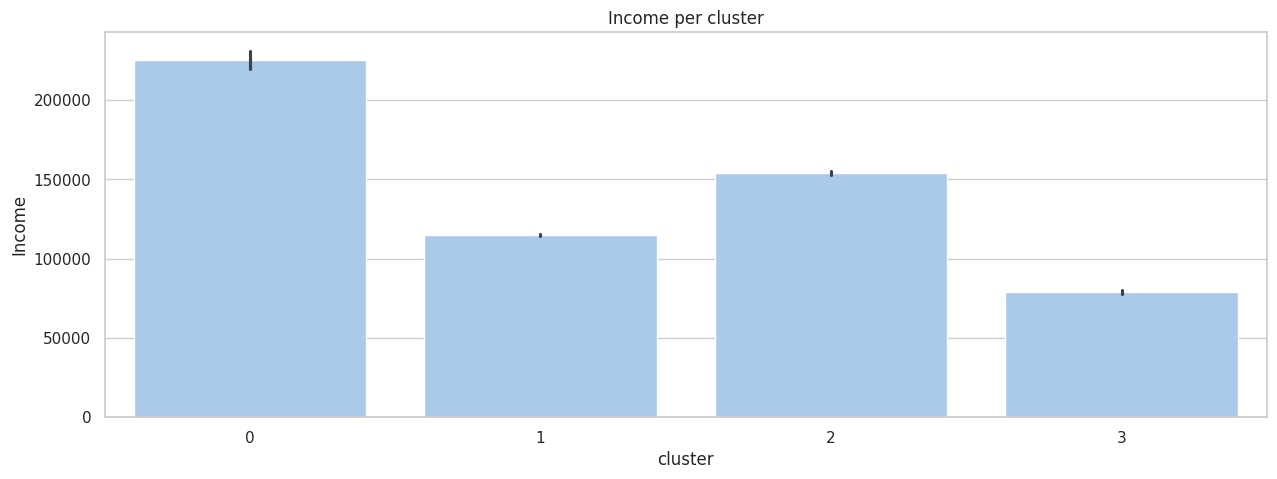

In [29]:
# Which Cluster has the best income?
plt.figure(figsize=(15,5))
sns.barplot(df, x = 'cluster', y = 'Income').set_title('Income per cluster')

Text(0.5, 1.0, 'Education level per cluster')

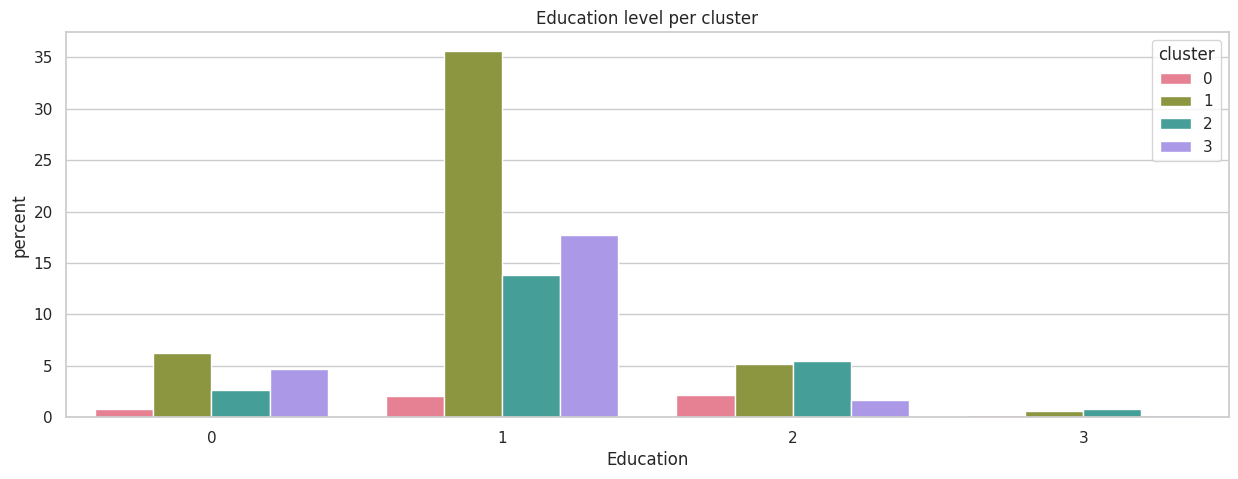

In [30]:
# Which cluster has the best education level?
plt.figure(figsize=(15,5))
sns.countplot(df, x = 'Education', hue = 'cluster',stat='percent', palette = sns.color_palette('husl', 4)).set_title('Education level per cluster')

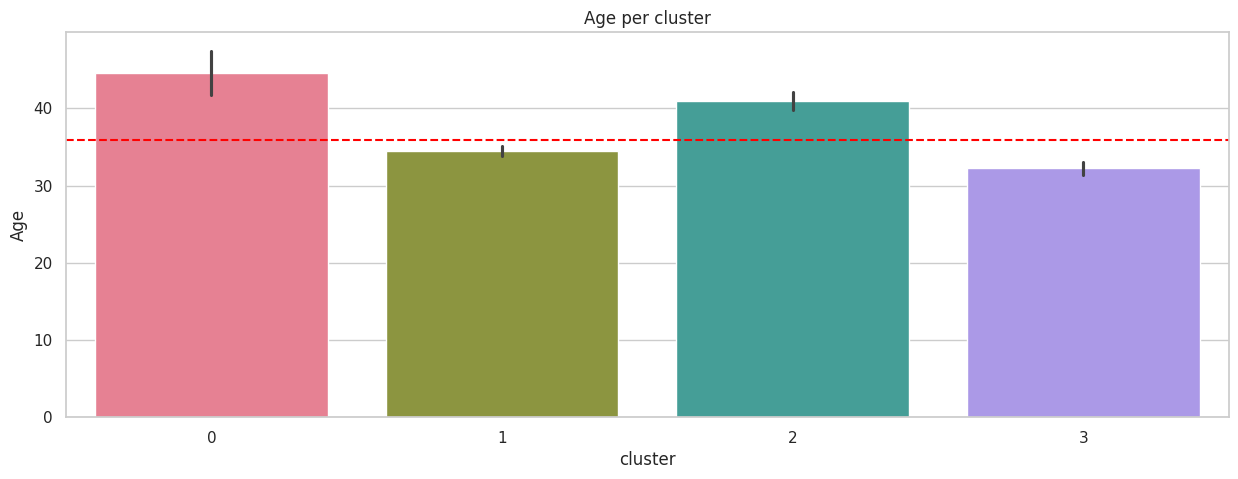

In [31]:
# What is the average age per cluster?
plt.figure(figsize=(15,5))
sns.barplot(df, x = 'cluster', y = 'Age', palette = sns.color_palette('husl', 4)).set_title('Age per cluster')
plt.axhline(df['Age'].mean(), 0,4, linestyle = '--', color = 'red')

Text(0.5, 1.0, 'Income per Age clustered')

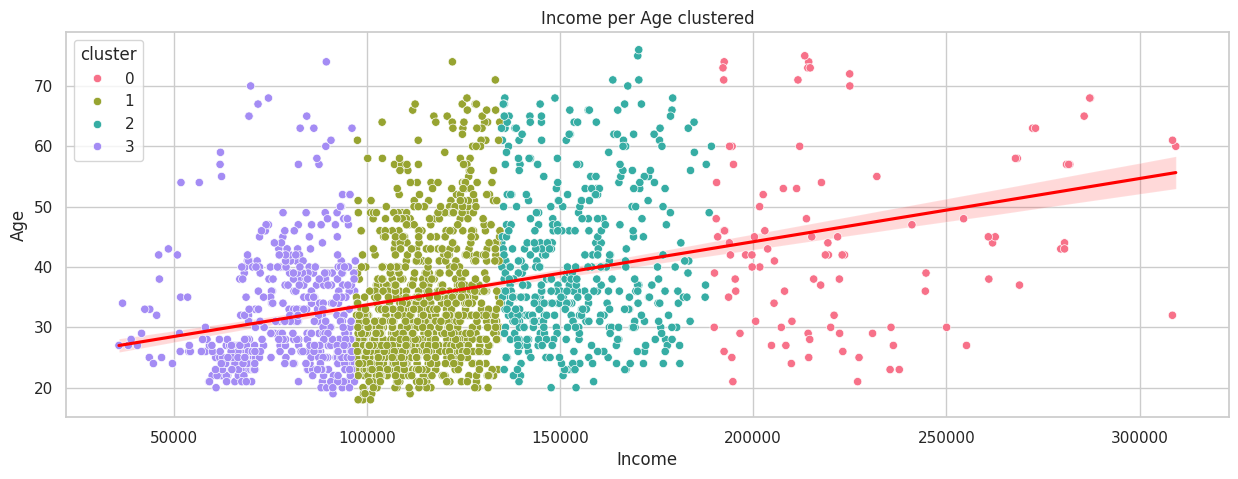

In [32]:
# Is Salary correlated with Age?
plt.figure(figsize=(15,5))
sns.regplot(df, x = 'Income', y= 'Age',scatter_kws={'alpha':0.0}, line_kws={'color':'red'})
sns.scatterplot(df, x='Income',y='Age',hue='cluster', palette = sns.color_palette('husl', 4))
plt.title('Income per Age clustered')

We can see that elder people earns more money than yonger people and we have it clusterized

### **Conclusion**

From the results of the k means clustering that we have done, it can be concluded that there are 4 clusters for customer segmentation, starting from income analysis per cluster, education per cluster and there are still many analyzes that can be done from these 4 clusters to get a better analysis.